<a href="https://colab.research.google.com/github/Tagtshen/Assignment-1-Computational-physics/blob/main/Assignment2codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 .Euler backward method

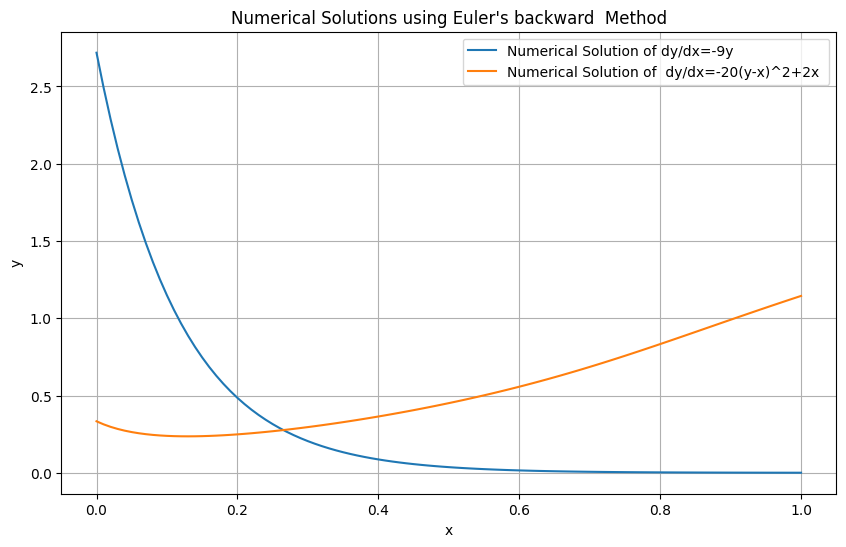

In [ ]:
#here we are suppose to solve the given  ODE  with euler method
import numpy as np
import matplotlib.pyplot as plt
import math

# first we solve the differential equation dy/dx=-9y
def euler_method1(x0, y0, h, x_max):
    x_values=[x0]
    y_values=[y0]
    while x_values[-1] < x_max:
        x = x_values[-1]
        y = y_values[-1]
        y_next = y / (1 + 9*h)
        x_values.append(x + h)
        y_values.append(y_next)
    return x_values, y_values
#initial conditions
x0=0
xn=1
y0=np.exp(1)
h=0.01  # the stepsize
x1,y1 = euler_method1(x0,y0,h,xn)

#here we solve the differential equation dy/dx=-20(y-x)^2+2x
def f(x,y):
    return -20*(y-x)**2 + 2*x

def g(x,y):
    return -40*(y-x)
def euler_method2(x0, y0, h, xn):
    x_values = [x0]
    y_values = [y0]
    N = int((xn-x0)*1.0/h)

    for i in range(N):
        t = 1
        y0 = 0
        while(t>0.001):
            y1 = y0 - (h*f(x0+i*h,y0)+y_values[-1]-y0)/(h*g(x0+i*h,y0)-1)   # using NEWTON'S METHOD to solve for roots
            t = np.abs(y1-y0)
            y0 = y1

        y_values.append(y0)
        x_values.append(x0+(i+1)*h)
    return x_values, y_values

#initial condition
x0=0
xn=1
y0=1/3
h=0.01  # the stepsize
x2,y2 = euler_method2(x0,y0, h, xn)


plt.figure(figsize=(10, 6))
plt.plot(x1,y1, label='Numerical Solution of dy/dx=-9y')
plt.plot(x2,y2, label='Numerical Solution of  dy/dx=-20(y-x)^2+2x ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Solutions using Euler\'s backward  Method')
plt.legend()
plt.grid(True)
plt.show()


Question 2. Euler method


x		y		y_actual	Abs_error
1.00		1.000000	1.000000	0.000000
1.10		1.000000	1.004282	0.004282
1.20		1.008264	1.014952	0.006688
1.30		1.021689	1.029814	0.008124
1.40		1.038515	1.047534	0.009019
1.50		1.057668	1.067262	0.009594
1.60		1.078461	1.088433	0.009972
1.70		1.100432	1.110655	0.010223
1.80		1.123262	1.133654	0.010392
1.90		1.146724	1.157228	0.010505
2.00		1.170652	1.181232	0.010581


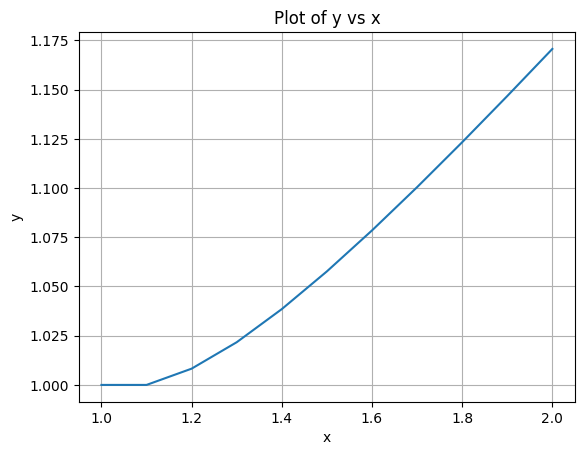

In [ ]:
import matplotlib.pyplot as plt
import math
def euler_method(f, x0, y0, xn, h):

    x_values = [x0]
    y_values = [y0]

    while x_values[-1] < xn:
        x_i = x_values[-1]
        y_i = y_values[-1]
        # Euler's method formula: y_i = y_i-1 + h * f(x_i-1, y_i-1)
        y_i_plus_1 = y_i + h * f(x_i, y_i)
        x_values.append(x_i + h)
        y_values.append(y_i_plus_1)

    return x_values, y_values

#  dy/dx = y/x-(y/x)**2
def ode_function(x, y):
    return y/x-(y/x)**2

x0 = 1  # Initial value of x
y0 = 1  # Initial value of y at x=0
xn = 2  # Final value of x
h = 0.1  # Step size
x_values, y_values = euler_method(ode_function, x0, y0, xn, h)

def actual_y(x):
  return x /(1+math.log(x))
x_val=[x0+ i*h for i in range(int((xn-x0)/h)+1)]
y_val=[actual_y(x) for x in x_values]
#print("x\t\t y_actual")
#for x,y_actual in zip(x_val,y_val):
 # print(f"{x:.2f}\t|\t{y_actual:.6f}")

# Print the solution
Abs_error = [abs(b - a) for a, b in zip(y_values ,y_val)]
#print(Abs_error)

print("x\t\ty\t\ty_actual\tAbs_error")
for x, y,y_actual, Abs_error in zip(x_values, y_values, y_val,Abs_error):
    print(f"{x:.2f}\t\t{y:.6f}\t{y_actual:.6f}\t{Abs_error:.6f}")

# Plot the graph
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y vs x')
plt.grid(True)
plt.show()



Question 3. FOURTH ORDER RUNGA KUTTA METHOD

x		y
0.00		0.000000
0.10		0.000009
0.20		0.000154
0.30		0.000834
0.40		0.002832
0.50		0.007430
0.60		0.016561
0.70		0.032996
0.80		0.060559
0.90		0.104401
1.00		0.171322
1.10		0.270164


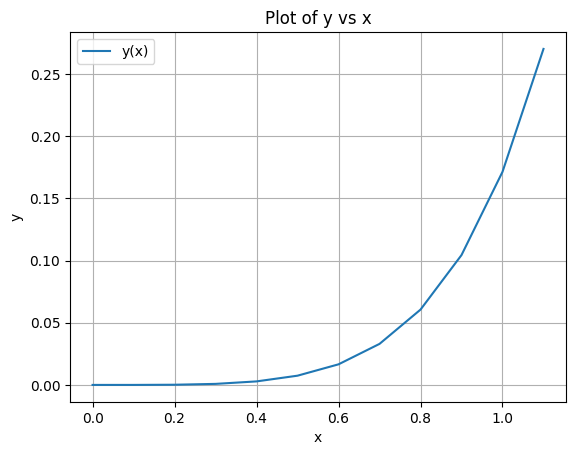

In [ ]:
# Here we have our differential equation as y''-2y'+y=xe^x-x
#given differential equations is of second order hence we need to bit modify our RK4 method to incorporate second order differential equaiton
# we will take y'= z and then the equation becomes z'= 2z-y+xe^x-x
# we can let f(x,y,z)=z and g(x,y,z) = 2z-y+xe^x-x
# with initial conditions as y(x=0)=0 and z(x=0)=0, x runs from 0<=x <=1.
import matplotlib.pyplot as plt
import math
def runge_kutta_second_order(f, g, x0, y0, z0, xn, h):


    x_values = [x0]
    y_values = [y0]
    z_values = [z0]

    while x_values[-1] <= xn:
        x_i = x_values[-1]
        y_i = y_values[-1]
        z_i = z_values[-1]

        k1_y = h * z_i
        k1_z = h * g(x_i, y_i, z_i)

        k2_y = h * (z_i + 0.5 * k1_z)
        k2_z = h * g(x_i + 0.5 * h, y_i + 0.5 * k1_y, z_i + 0.5 * k1_z)

        k3_y = h * (z_i + 0.5 * k2_z)
        k3_z = h * g(x_i + 0.5 * h, y_i + 0.5 * k2_y, z_i + 0.5 * k2_z)

        k4_y = h * (z_i + k3_z)
        k4_z = h * g(x_i + h, y_i + k3_y, z_i + k3_z)

        y_i_plus_1 = y_i + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6
        z_i_plus_1 = z_i + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6

        x_values.append(x_i + h)
        y_values.append(y_i_plus_1)
        z_values.append(z_i_plus_1)

    return x_values, y_values, z_values

#  dy/dx = z, dz/dx = 2z-y+xe^x-x
def f(x, y, z):
    return z

def g(x, y, z):
    return 2*z-y+x*math.exp(x)-x

#initial conditions
x0 = 0  # Initial value of x
y0 = 0  # Initial value of y at x=0
z0 = 0  # Initial value of z at x=0
xn = 1  # Final value of x
h = 0.1  # Step size
x_values, y_values, z_values = runge_kutta_second_order(f, g, x0, y0, z0, xn, h)

# Print the solution
print("x\t\ty")
for x, y, z in zip(x_values, y_values, z_values):
    print(f"{x:.2f}\t\t{y:.6f}")

# Plot the graph
plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y vs x')
plt.grid(True)
plt.legend()
plt.show()


Question 6. Shooting method


[[0, 28.0, 53.5, 76.5, 97.0, 115.0, 130.5, 143.5, 154.0, 162.0, 167.5, 170.5, 171.0, 169.0, 164.5, 157.5, 148.0, 136.0, 121.5, 104.5, 85.0]]
[[0, 28.0, 53.5, 76.5, 97.0, 115.0, 130.5, 143.5, 154.0, 162.0, 167.5, 170.5, 171.0, 169.0, 164.5, 157.5, 148.0, 136.0, 121.5, 104.5, 85.0], [0, 23.75, 45.0, 63.75, 80.0, 93.75, 105.0, 113.75, 120.0, 123.75, 125.0, 123.75, 120.0, 113.75, 105.0, 93.75, 80.0, 63.75, 45.0, 23.75, 0.0]]
Converged after 1 iterations.


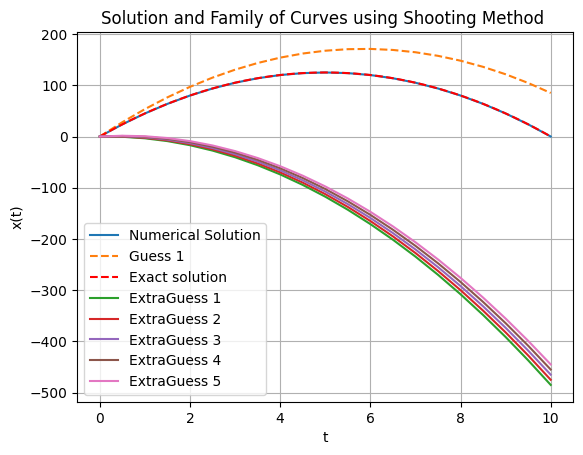

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
g=10
# we take dx/dt=yand define our functions as follows
def f1(t,x,y):
    return y
def f2(t,x,y):
    return -g

def euler_method(f1, f2, t0, x0, y0, h, t_max): #defining the algorithm for Euler method
    t_values=[t0]
    x_values=[x0]
    y_values=[y0]
    while t_values[-1] < t_max:
        t = t_values[-1]
        y = y_values[-1]
        x = x_values[-1]
        x_next = x + h * f1(t, x, y)
        y_next = y + h * f2(t, x, y)#calculating the value of y at next mesh point based on previous data
        t_values.append(t + h) #adding the next value in the array
        x_values.append(x_next)
        y_values.append(y_next)
    return t_values, x_values, y_values


def shooting_method(t0, t_max, x0, x1, y0, tol=1e-6, max_iter=100):
    family_of_curves = []
    for i in range(max_iter):
        t, x, _ = euler_method(f1, f2, t0, x0, y0, 0.5, t_max)
        family_of_curves.append(x)
        print(family_of_curves)
        res = x[-1] - x1
        if abs(res) < tol:
            print(f"Converged after {i} iterations.")
            return family_of_curves, t, x
        y0 -= res / 10  # adjust the initial guess using simple Newton's method
    print("Did not converge within maximum iterations.")
    return None, None, None
t0 = 0
t_max = 10
x1 = 0
y0=56
x0 = 0
family_of_curves, t, sol = shooting_method(t0, t_max, x0, x1, y0)

def exact_sol(t):
    return -5* t**2 + 50*t
t_values = np.linspace(0, 10, 100)
function_values = exact_sol(t_values)
    # Plot the solution and family of curves
plt.plot(t, sol, label='Numerical Solution')

n = len(family_of_curves)
for i in range(n-1):
    plt.plot(t, family_of_curves[i], linestyle='--', label=f'Guess {i+1}')

plt.plot(t_values, function_values,linestyle='--', label='Exact solution',color='red')

for i in range(5):
    y0 = i - 1
    t, x, _ = euler_method(f1, f2, t0, x0, y0, 0.5, t_max)
    plt.plot(t, x, label=f'ExtraGuess {i+1}' )
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution and Family of Curves using Shooting Method ')
plt.legend()
plt.grid(True)
plt.show()





Question 8 : here we make use of scipy.integrate.solve_ivp to solve IVP given in question 8

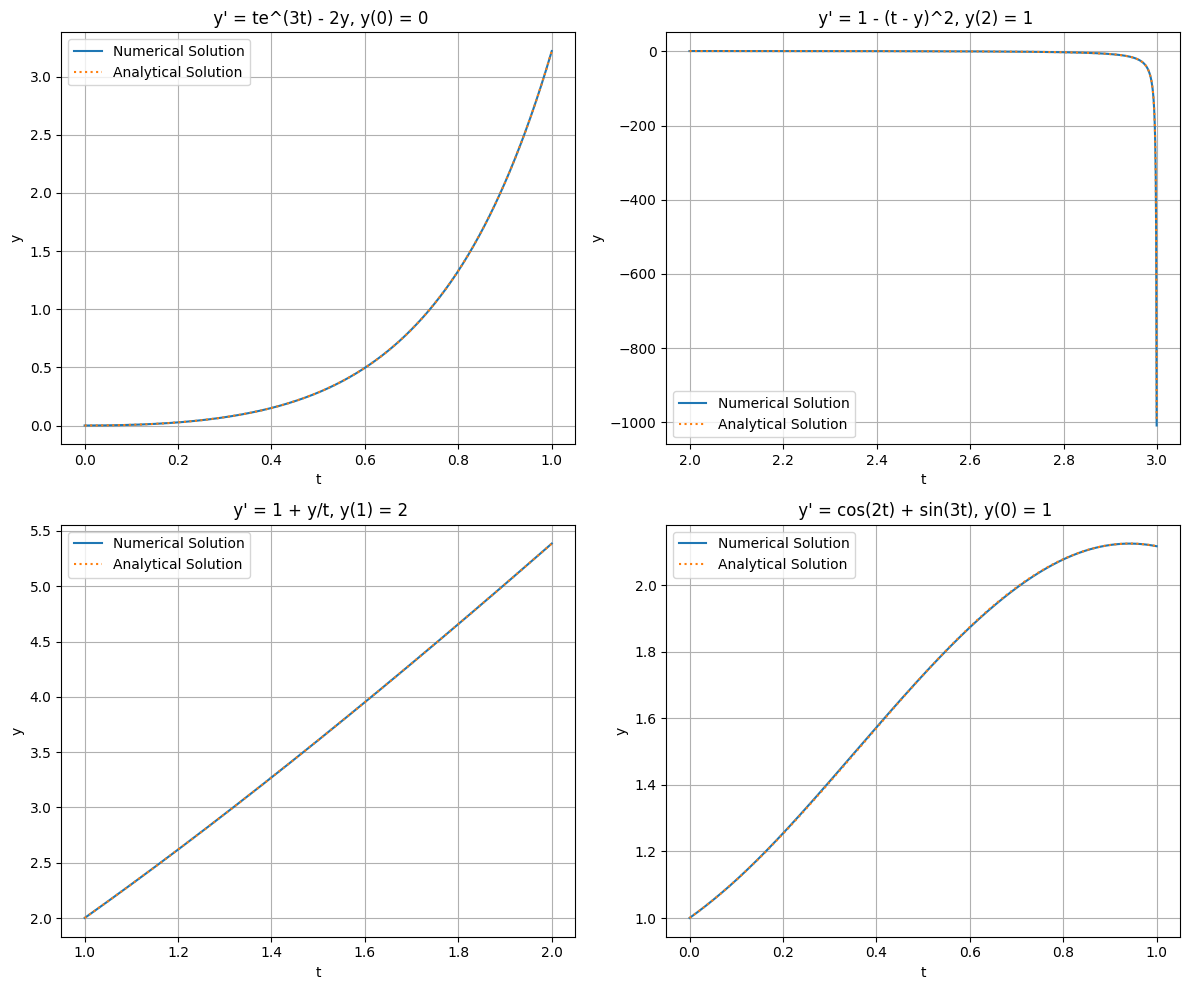

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


# Here we define the functions for each initial value problem
def f1(t, y):
    return t * np.exp(3 * t) - 2 * y       #corresponding to y'=te^(3t)-2y

def f2(t, y):
    return 1 - (t - y)**2                  #corresponding to   y'=1-(t-y)^2

def f3(t, y):
    return 1 + y / t                      #correspoing to y'= 1+y/t

def f4(t, y):
    return np.cos(2 * t) + np.sin(3 * t)  #corresponding to y'= cos2t+sin3t

# given that the analytical exact solutions for each problem
def y_exact1(t):
    return (1/25) * np.exp(-2*t) * (1 + np.exp(5*t) * (-1 + 5*t))

def y_exact2(t):
    return (1 - 3* t + t**2) / (-3 + t)

def y_exact3(t):
    return t * (2 + np.log(t))

def y_exact4(t):
    return (1/6) * (8 - 2 * np.cos(3 * t) + 3 * np.sin(2 * t))

# Define the initial conditions and time ranges for each problem
t_range1 = [0, 1] #range of t for which we want our solution
y0_1 = [0] # initial condition
t_range2 = [2, 3]
y0_2 = [1]
t_range3 = [1, 2]
y0_3 = [2]
t_range4 = [0, 1]
y0_4 = [1]

# Solve each initial value problem numerically
sol1 = solve_ivp(f1, t_range1, y0_1, t_eval=np.linspace(t_range1[0], t_range1[1], 1000))
sol2 = solve_ivp(f2, t_range2, y0_2, t_eval=np.linspace(t_range2[0], t_range2[1], 1000))
sol3 = solve_ivp(f3, t_range3, y0_3, t_eval=np.linspace(t_range3[0], t_range3[1], 1000))
sol4 = solve_ivp(f4, t_range4, y0_4, t_eval=np.linspace(t_range4[0], t_range4[1], 1000))

# Plot the numerical solutions
plt.figure(figsize=(12, 10))

# Plot for problem 1
plt.subplot(2, 2, 1)
plt.plot(sol1.t, sol1.y[0], label='Numerical Solution')
plt.plot(sol1.t, y_exact1(sol1.t), label='Analytical Solution', linestyle=':')
plt.xlabel('t')
plt.ylabel('y')
plt.title(' y\' = te^(3t) - 2y, y(0) = 0')
plt.legend()
plt.grid(True)

# Plot for problem 2
plt.subplot(2, 2, 2)
plt.plot(sol2.t, sol2.y[0], label='Numerical Solution')
plt.plot(sol2.t, y_exact2(sol2.t), label='Analytical Solution', linestyle=':')
plt.xlabel('t')
plt.ylabel('y')
plt.title(' y\' = 1 - (t - y)^2, y(2) = 1')
plt.legend()
plt.grid(True)

# Plot for problem 3
plt.subplot(2, 2, 3)
plt.plot(sol3.t, sol3.y[0], label='Numerical Solution')
plt.plot(sol3.t, y_exact3(sol3.t), label='Analytical Solution', linestyle=':')
plt.xlabel('t')
plt.ylabel('y')
plt.title(' y\' = 1 + y/t, y(1) = 2')
plt.legend()
plt.grid(True)

# Plot for problem 4
plt.subplot(2, 2, 4)
plt.plot(sol4.t, sol4.y[0], label='Numerical Solution')
plt.plot(sol4.t, y_exact4(sol4.t), label='Analytical Solution', linestyle=':')
plt.xlabel('t')
plt.ylabel('y')
plt.title(' y\' = cos(2t) + sin(3t), y(0) = 1')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Question 9: using scipy.integrate.solve_bvp to solve given boundary value problems in question 9

<ipython-input-49-614f83812260>:14: RuntimeWarning: divide by zero encountered in log
  return np.vstack((y[1], y[1]*np.cos(x) - y[0]*np.log(y[0])))
<ipython-input-49-614f83812260>:14: RuntimeWarning: invalid value encountered in multiply
  return np.vstack((y[1], y[1]*np.cos(x) - y[0]*np.log(y[0])))


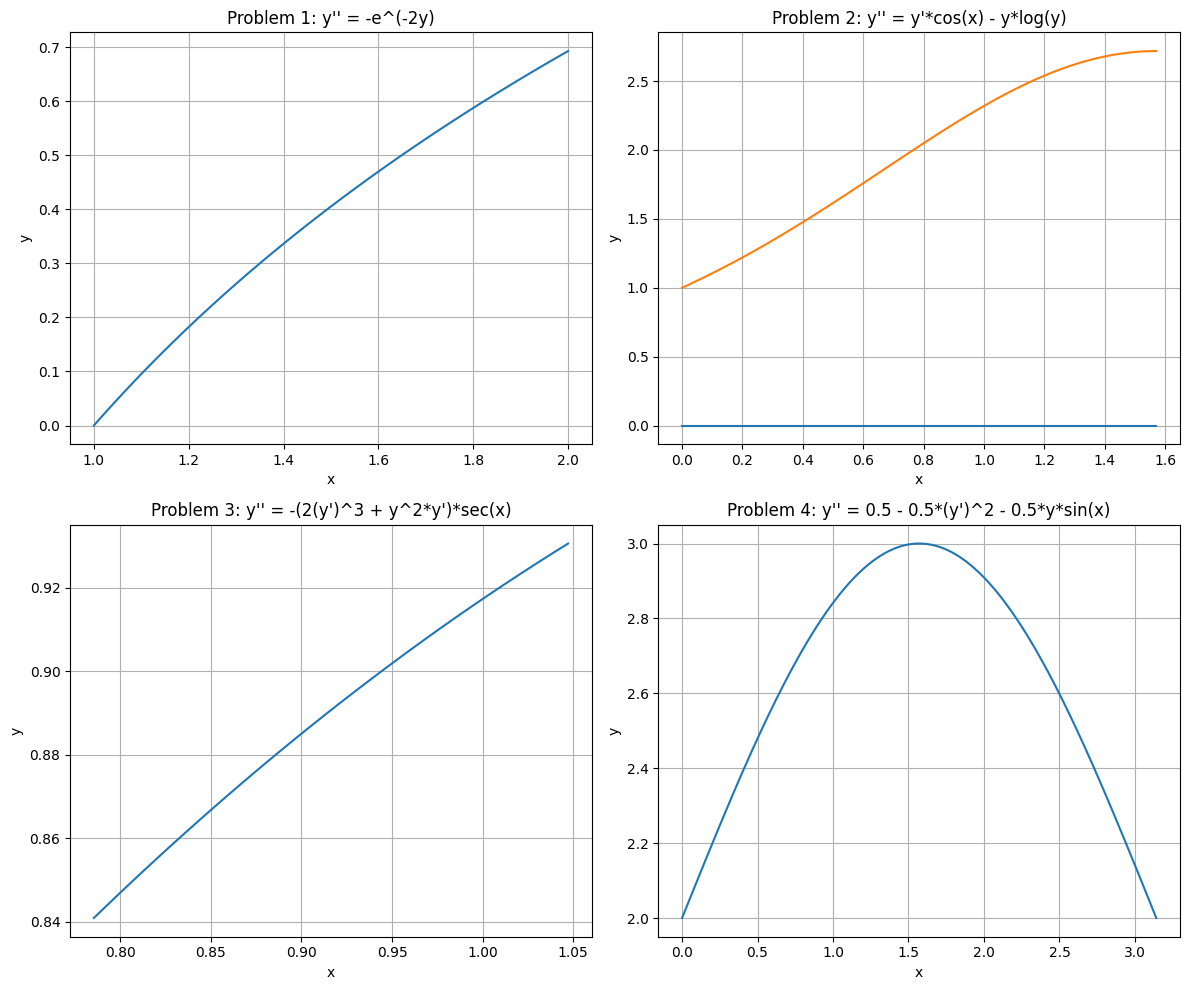

In [ ]:
#here we hvae four second order BVP to be solved using scipy.integrate.solve_bvp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import numpy as np
# !.we have  y′′ = −e^(−2y) with 1 ≤ x ≤ 2, y(1) = 0, and y(2) = ln 2
def f1(x, y):
    return np.vstack((y[1], -np.exp(-2*y[0])))

def bc1(ya, yb):
    return np.array([ya[0], yb[0] - np.log(2)])

# 2. we have y′′ = y′ cos x − y ln y with 0 ≤ x ≤ π/2, y(0) = 1, and y(π/2) = e
def f2(x, y):
    return np.vstack((y[1], y[1]*np.cos(x) - y[0]*np.log(y[0])))

def bc2(ya, yb):
    return np.array([ya[0] - 1, yb[0] - np.exp(1)])

#3. We have y′′ = −(2(y′)^3 + y^2y′) sec x with π/4 ≤ x ≤ π/3, y(π/4) = 2^(−1/4), and y(π/3) = 12^(1/4)/2
def f3(x, y):
    return np.vstack((y[1], -(2*y[1]**3 + y[0]**2*y[1])*1/np.cos(x)))

def bc3(ya, yb):
    return np.array([ya[0] - 2**(-1/4), yb[0] - (12**0.25)/2])

# 4. We have y′′ = 1/2 − (y′)^(2)/2 − y sin x/2 with 0 ≤ x ≤ π, y(0) = 2, and y(π) = 2
def f4(x, y):
    return np.vstack((y[1], 0.5 - 0.5*y[1]**2 - 0.5*y[0]*np.sin(x)))

def bc4(ya, yb):
    return np.array([ya[0] - 2, yb[0] - 2])

# Solve each problem
x1 = np.linspace(1, 2, 100)
y_guess1 = np.zeros((2, x1.size))
sol1 = solve_bvp(f1, bc1, x1, y_guess1)

x2 = np.linspace(0, 0.5*np.pi, 100)
y_guess2 = np.zeros((2, x2.size))
y_b = np.zeros((2, x2.size))
y_b[0] = np.exp(1)
sol21 = solve_bvp(f2, bc2, x2, y_guess2)
sol22 = solve_bvp(f2, bc2, x2, y_b)

x3 = np.linspace(np.pi/4, np.pi/3, 100)
y_guess3 = np.zeros((2, x3.size))
sol3 = solve_bvp(f3, bc3, x3, y_guess3)

x4 = np.linspace(0, np.pi, 100)
y_guess4 = np.zeros((2, x4.size))
sol4 = solve_bvp(f4, bc4, x4, y_guess4)

# Define the analytical solutions for each problem
def y_analytical1(t):
    return (1/25) * np.exp(-2*t) * (1 + np.exp(5*t) * (-1 + 5*t))

def y_analytical2(t):
    return (1 - 3* t + t**2) / (-3 + t)

def y_analytical3(t):
    return t * (2 + np.log(t))

def y_analytical4(t):
    return (1/6) * (8 - 2 * np.cos(3 * t) + 3 * np.sin(2 * t))

# Plot solutions
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 1: y\'\' = -e^(-2y)')
plt.grid()

plt.subplot(222)
plt.plot(sol21.x, sol21.y[0])
plt.plot(sol22.x, sol22.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 2: y\'\' = y\'*cos(x) - y*log(y)')
plt.grid()

plt.subplot(223)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 3: y\'\' = -(2(y\')^3 + y^2*y\')*sec(x)')
plt.grid()

plt.subplot(224)
plt.plot(sol4.x, sol4.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 4: y\'\' = 0.5 - 0.5*(y\')^2 - 0.5*y*sin(x)')
plt.grid()

plt.tight_layout()
plt.show()


Question 10: adaptive step size control with RK4 method

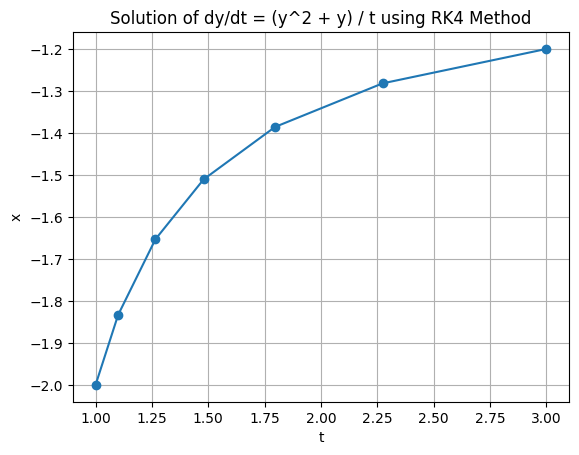

In [16]:
#Here we solve y'=(y^2+y)/t with 1<=t<=3 adn y(1)=-2 using adaptive step size control in RK4 method
import numpy as np
import matplotlib.pyplot as plt


def g(t, x):
    return (x**2 + x) / t

def RK4_first_order_eqn(f, t, x, dt):
    k1 = dt * f(t, x)
    k2 = dt * f(t + 0.5 * dt, x + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, x + 0.5 * k2)
    k4 = dt * f(t + dt, x + k3)
    x1 = x + (k1 + 2*k2 + 2*k3 + k4) / 6
    return x1

dt = 0.1
t_initial = 1
t_final = 3
x_initial = -2
tol = 10**(-4)

T = [t_initial]
X = [x_initial]
while T[-1] + dt < t_final:
    s1 = RK4_first_order_eqn(g, T[-1], X[-1], dt)
    X.append(s1)
    T.append(T[-1] + dt)
    s2 = RK4_first_order_eqn(g, T[-1], X[-1], dt)
    u1 = RK4_first_order_eqn(g, T[-2], X[-2], 2 * dt)
    if np.abs(s2 - u1) == 0:
        rho = 1
    else:
        rho = (tol * dt * 30 / np.abs(s2 - u1))**(1/4)
    dt = dt * rho

dt = t_final - T[-1]
X.append(RK4_first_order_eqn(g, T[-1], X[-1], dt))
T.append(t_final)

plt.figure(0)
plt.plot(T, X, marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Solution of dy/dt = (y^2 + y) / t using RK4 Method')
plt.grid(True)
plt.show()



Question 11.

In [ ]:
#Here we will solve IVP using RK4 method
import numpy as np

def f(t, y):
    return 1 / (y**2 + t**2)

def RK4_first_order_eqn(f, t, y, dt):
    k1 = np.multiply(dt, f(t, y))
    k2 = np.multiply(dt, f(t + 0.5 * dt, y + 0.5 * k1))
    k3 = np.multiply(dt, f(t + 0.5 * dt, y + 0.5 * k2))
    k4 = np.multiply(dt, f(t + dt, y + k3))

    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y_next

dt_initial = 0.1
t_start = 0
t_end = 3.5 * (10**6)
y_start = 1
tolerance = 10**(-7)

T_values = [t_start]
Y_values = [y_start]

while T_values[-1] + dt_initial < t_end:
    s1 = RK4_first_order_eqn(f, T_values[-1], Y_values[-1], dt_initial)
    Y_values.append(s1)
    T_values.append(T_values[-1] + dt_initial)
    s2 = RK4_first_order_eqn(f, T_values[-1], Y_values[-1], dt_initial)
    u1 = RK4_first_order_eqn(f, T_values[-2], Y_values[-2], 2 * dt_initial)
    if np.abs(s2 - u1) == 0:
        rho = 1
    else:
        rho = (tolerance * dt_initial * 30 / np.abs(s2 - u1))**(1/4)
    dt_initial = dt_initial * rho

dt_final = t_end - T_values[-1]
Y_values.append(RK4_first_order_eqn(f, T_values[-1], Y_values[-1], dt_final))
T_values.append(t_end)

print('t =', T_values[-1], ':', 'x =', Y_values[-1])


t = 3500000.0 : x = 2.1448823342037007


Question 12 . Four order RK method solve IVP for systmem of linear first order differential equation

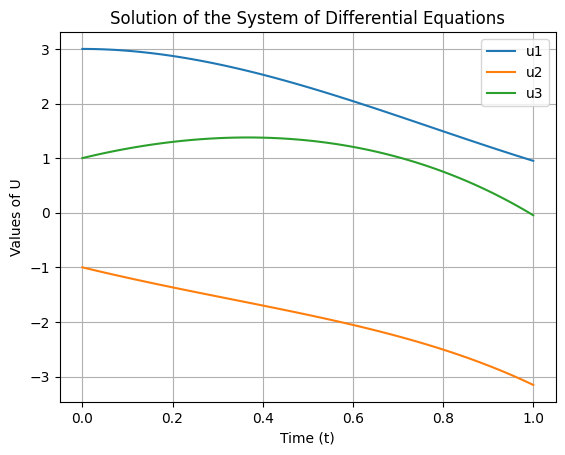

In [ ]:
#Here we hvae system of first order differntial equations to be solved using RK4 method the differntial equaitions are given by
# du1/dt =u1 + 2u2 − 2u3 + e^(−t) , du2/dt = u2 + u3 − 2e^(−t), du3/dt = u1 + 2y2 + e^(−t)
# with 0 ≤ t ≤ 1, u1(0) = 3, u2(0) = −1, and u3(0) = 1.
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    # Define the system of differential equations
    dydt = np.zeros_like(y)
    # Example equations: du1/dt =u1 + 2u2 − 2u3 + e^(−t) , du2/dt = u2 + u3 − 2e^(−t), du3/dt = u1 + 2y2 + e^(−t)
    dydt[0] = y[0] + 2*y[1]-2*y[2]+np.exp(t)
    dydt[1] = y[1] + y[2] - 2*np.exp(-t)
    dydt[2] = y[0] +2*y[1]+np.exp(-t)
    return dydt

def RK4(y0, t0, tf, h):
    # Initialize arrays to store solutions
    n = len(y0)
    t = np.arange(t0, tf+h, h)
    y = np.zeros((len(t), n))
    y[0] = y0

    # Implement RK4 method
    for i in range(len(t)-1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h/2, y[i] + k1/2)
        k3 = h * f(t[i] + h/2, y[i] + k2/2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, y

# Initial conditions and time span
y0 = np.array([3, -1, 1])  # Initial values of y1, y2, y3
t0 = 0  # Initial time
tf = 1  # Final time
h = 0.01  # Step size

# Solve the system using RK4 method
t, y = RK4(y0, t0, tf, h)

# Plot the results
plt.plot(t, y[:, 0], label='u1')
plt.plot(t, y[:, 1], label='u2')
plt.plot(t, y[:, 2], label='u3')
plt.xlabel('Time (t)')
plt.ylabel('Values of U')
plt.title('Solution of the System of Differential Equations')
plt.legend()
plt.grid(True)
plt.show()


Question 16. C code implementing euler method to solve the ODE with intial condition.



In [17]:
#include <stdio.h>
#include <math.h>

// Define the differential equation dy/dt = f(t, y)
double f(double t, double y) {
    // Define the function f(t, y) here
    return  y-t*t+1;
}

// Define the exact analytical solution y(t)
double exact_solution(double t) {
    // Define the exact analytical solution y(t) here
    return (t+1)*(t+1)-0.5*exp(t);
}

int main() {
    double t0 = 0; // Initial value of t
    double y0 = 0.5; // Initial value of y
    double h = 0.1;  // Step size
    double t_final = 2; // Final value of t

    double t = t0;
    double y = y0;
    double y_exact;

    // Output the table header
    printf("t\t\t Euler's y \t\t Exact y \t\t Absolute Error\n");

    // Perform Euler's method and calculate absolute error at each step
    while (t <= t_final) {
        y_exact = exact_solution(t); // Compute exact solution at current t

        // Calculate Euler's y value
        y += h * f(t, y);

        // Calculate absolute error
        double absolute_error = fabs(y - y_exact);

        // Output the values in tabular format
        printf("%.6f\t\t %.6f\t\t %.6f\t\t %.6f\n", t, y, y_exact, absolute_error);

        // Move to the next step
        t += h;
    }

    return 0;
}


SyntaxError: unterminated string literal (detected at line 29) (<ipython-input-17-65ec276e2b0a>, line 29)